In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#create a small synthetic transactions table to practice
np.random.seed(0)
n = 200
df = pd.DataFrame({
    "tx_hash": [f"tx{i}" for i in range(n)],
    "from_addr": np.random.choice([f"wallet_{i}" for i in range(30)], n),
    "to_addr": np.random.choice([f"wallet_{i}" for i in range(30,70)], n),
    "value_eth": np.round(np.random.exponential(0.5, n), 4),
    "gas": np.random.randint(21000, 100000, n),
    "timestamp": pd.date_range("2025-10-01", periods=n, freq="H")
})
df.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_15048\3941148618.py:10: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  "timestamp": pd.date_range("2025-10-01", periods=n, freq="H")


,tx_hash,from_addr,to_addr,value_eth,gas,timestamp
0,tx0,wallet_12,wallet_33,0.3591,33404,2025-10-01 00:00:00
1,tx1,wallet_15,wallet_44,0.4343,63477,2025-10-01 01:00:00
2,tx2,wallet_21,wallet_62,0.7745,96312,2025-10-01 02:00:00
3,tx3,wallet_0,wallet_34,0.4663,60021,2025-10-01 03:00:00
4,tx4,wallet_3,wallet_33,0.1232,31194,2025-10-01 04:00:00


In [4]:
# per-wallet aggregated features (incoming and outgoing)
out_features = df.groupby("from_addr").agg(
    tx_count_out=("tx_hash", "count"),
    total_out_value=("value_eth", "sum"),
    avg_gas_out=("gas", "mean")
).reset_index().rename(columns={"from_addr":"wallet"})

in_features = df.groupby("to_addr").agg(
    tx_count_in=("tx_hash", "count"),
    total_in_value=("value_eth", "sum"),
).reset_index().rename(columns={"to_addr":"wallet"})

wallets = out_features.merge(in_features, on="wallet", how="outer").fillna(0)
wallets.head()

,wallet,tx_count_out,total_out_value,avg_gas_out,tx_count_in,total_in_value
0,wallet_0,12.0,4.4151,73965.916667,0.0,0.0
1,wallet_1,5.0,2.8476,63150.800000,0.0,0.0
2,wallet_10,7.0,2.9655,62771.714286,0.0,0.0
3,wallet_11,7.0,3.2588,65551.571429,0.0,0.0
4,wallet_12,4.0,1.8228,72072.500000,0.0,0.0


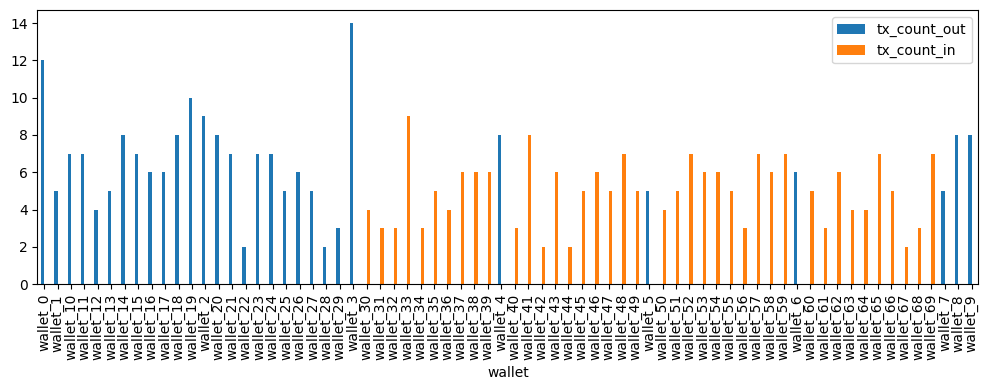

In [5]:
wallets[["wallet","tx_count_out","tx_count_in"]].set_index("wallet").plot(kind="bar", figsize=(10,4))
plt.tight_layout()

In [ ]:
 b